In [1]:
%autosave 0

Autosave disabled


In [2]:
from IPython.core.display import HTML
#css_file = '../../../style/style03my.css'
css_file = '../../../style/style01.css'
HTML(open(css_file, "r").read())

>### [Sergio Rojas](http://prof.usb.ve/srojas)<br>
[Departamento de F&iacute;sica](http://www.fis.usb.ve/), [Universidad Sim&oacute;n Bol&iacute;var](http://www.usb.ve/), [Venezuela](http://es.wikipedia.org/wiki/Venezuela)

>#### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2016-2017 Sergio Rojas (srojas@usb.ve).###

In [3]:
from IPython.display import HTML
from IPython.display import Image

In [4]:
#HTML('<iframe src=https://en.wikipedia.org/wiki/Mathematical_optimization width=700 height=350></iframe>')

In [5]:
#Image(filename='./Volume_2_Video_2.1_figs/vol2_v21_0x_Jderivatives.png', width=720, height=720)

### [Overview of the regression problem](https://en.wikipedia.org/wiki/Regression_analysis)

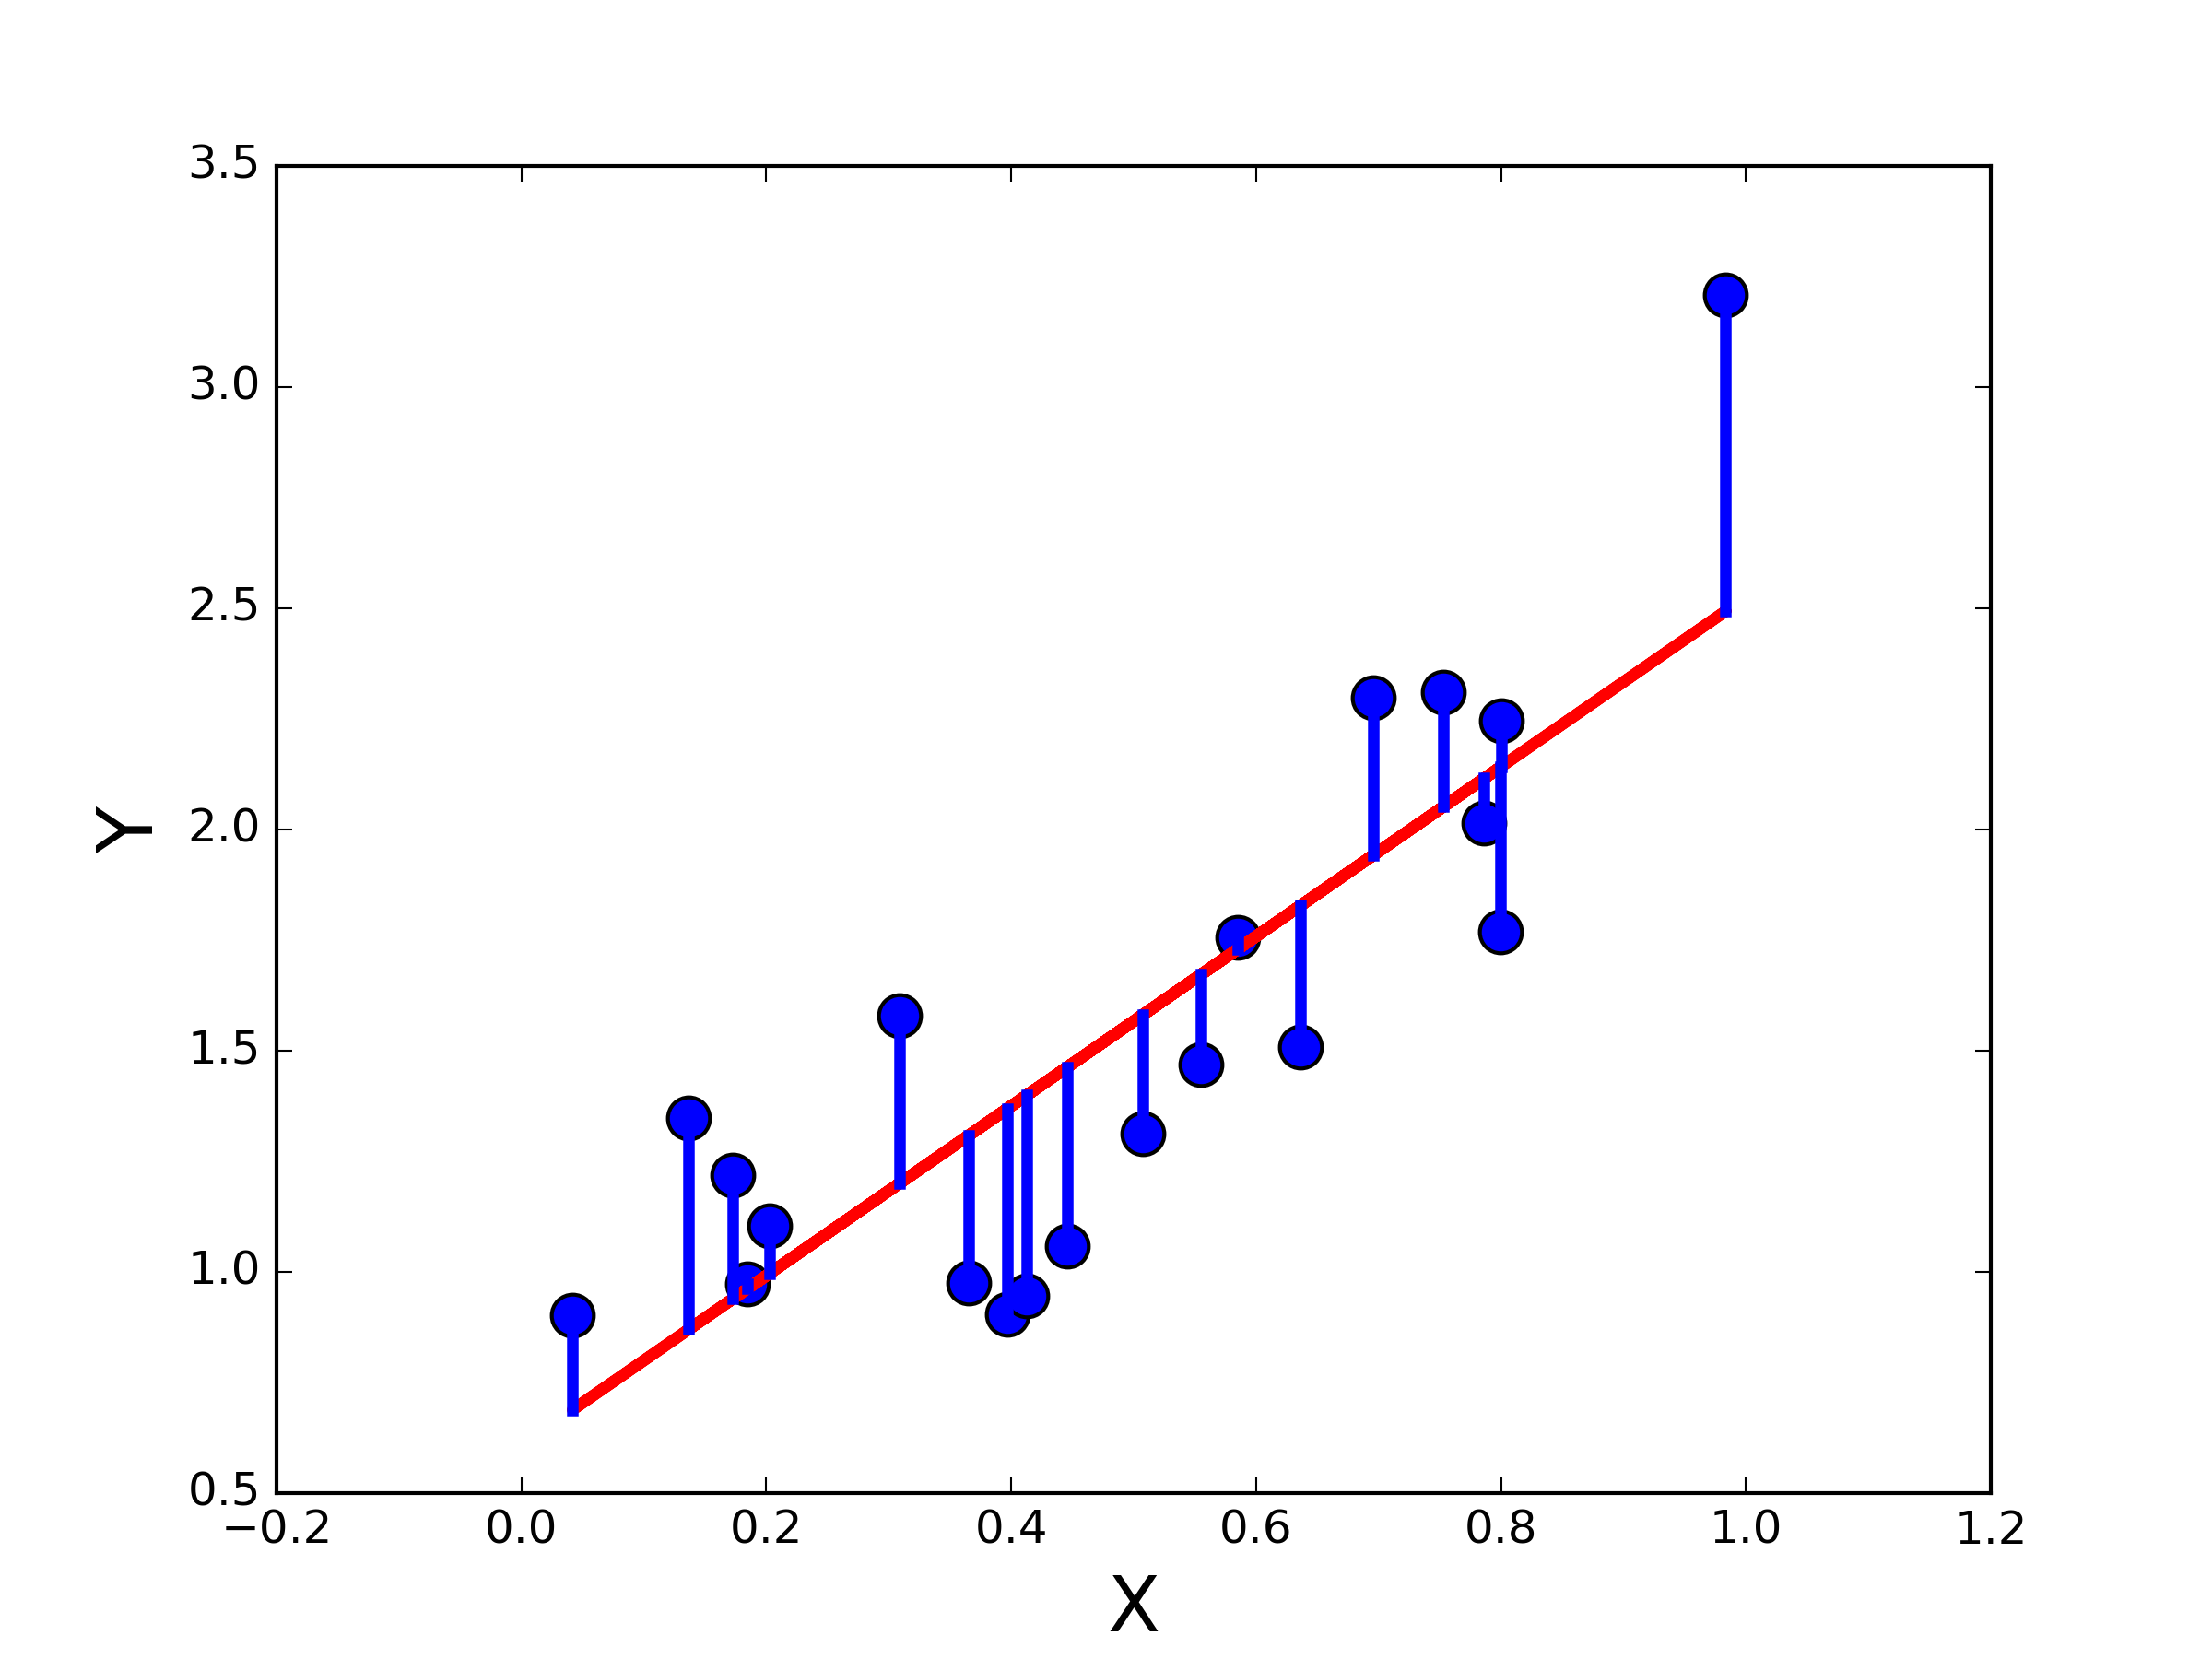

In [6]:
Image(filename='./img/fig_basic_regression.png', width=720, height=720)

### [The linear regression problem](https://en.wikipedia.org/wiki/Regression_analysis)

\begin{aligned}
        {\textbf h}(\mathbf{\theta}) = \theta_0 {\textbf X}_0 + \theta_1 {\textbf X}_1 + \theta_2 {\textbf X}_2 + \cdots + \theta_n {\textbf X}_n =       
%        
\begin{pmatrix} {\textbf X}_0 \; {\textbf X}_1 \; {\textbf X}_2 \; \cdots \; {\textbf X}_n \end{pmatrix}
        \begin{pmatrix}\theta_0 \\
                       \theta_1 \\
                       \theta_2 \\
                       \vdots \\
                       \theta_n \end{pmatrix}
        %
        \end{aligned}

\begin{aligned}
        J(\theta) &= \frac{1}{2m}\sum_{i=1}^m \left[ h^{(i)}(\theta)-y^{(i)}\right]^2 \\
                  &= \frac{1}{2m}\sum_{i=1}^m \left[ \theta_0 X_0^{(i)} + \theta_1 X_1^{(i)} + \theta_2 X_2^{(i)} + \cdots + \theta_n X_n^{(i)} - y^{(i)}\right]^2,
        \end{aligned}

\begin{aligned}
       X = 
        \begin{pmatrix}
               X_0^{(1)} \quad X_1^{(1)} \quad X_2^{(1)} \quad \cdots \quad X_n^{(1)} \\
               X_0^{(2)} \quad X_1^{(2)} \quad X_2^{(2)} \quad \cdots \quad X_n^{(2)} \\
               X_0^{(3)} \quad X_1^{(3)} \quad X_2^{(3)} \quad \cdots \quad X_n^{(3)} \\
                \vdots   \quad  \vdots   \quad \vdots    \quad \vdots \quad \vdots  \\
               X_0^{(m)} \quad X_1^{(m)} \quad X_2^{(m)} \quad \cdots \quad X_n^{(m)}
         \end{pmatrix}
\end{aligned}

### The Gradient Descent algorithm

\begin{aligned}
\theta_k = \theta_k - \alpha \frac{\partial J(\theta)}{\!\!\!\! \partial \theta_k}, 
\end{aligned}

##### Derivatives of the squared error cost function

\begin{aligned}
\begin{pmatrix} 
             \frac{\partial J(\theta)}{\!\!\!\! \partial \theta_0} \\ 
             \frac{\partial J(\theta)}{\!\!\!\! \partial \theta_1} \\
             \frac{\partial J(\theta)}{\!\!\!\! \partial \theta_2} \\ 
                        \vdots \\
             \frac{\partial J(\theta)}{\!\!\!\! \partial \theta_n} 
         \end{pmatrix} =
   \frac{1}{m}\left[ \mathbf{-X}^{\rm T} \mathbf y+ (\mathbf X^{\rm T} \mathbf X ){\boldsymbol{\theta}} \right]   =
   \frac{1}{m}\mathbf{X}^{\rm T} \left[ \mathbf X {\boldsymbol{\theta}} - \mathbf y  \right]
\end{aligned}

##### Computing the J cost function

In [7]:
def JcostF(theta, X, y):
    #----
    # In this function it is computed the J squared error cost function
    # or the function to which the minimum is going to be found
    #
    # The input parameters are the data points defining the function
    #      
    #       X : as a column matrix 
    #       y : as a column vector
    #   theta : the parameters fitting the model
    #
    # Author: Sergio Rojas
    #----
    import numpy as np
    m = len(y) # number of training examples
    #
    h = np.dot(X,theta) # also: X.dot(theta)
    square = (h-y)**2
    J = 1.0/(2.0*m) * np.sum(square)
    #
    return J

##### Our implementation of Gradient Descent

In [8]:
def GradientDescent(X, y, theta, alpha, MAX_ITERS=1000, tolerance = 1e-05 ):
    #----
    # In this function it is computed the gradient descent algorithm
    # that updates the thetas:
    #
    # The input parameters:
    #      
    #       X : as a column matrix 
    #       y : as a column vector
    #   theta : the parameters fitting the model
    #   alpha : the learning rate
    #  
    # Author: Sergio Rojas
    #----
    import numpy as np
    m = len(y) # number of training examples
    J = np.array([])
    tol = 1
    k = 0
    while (tol > tolerance) and (k <= MAX_ITERS):
        k = k + 1
        h = np.dot(X,theta)
        temp = np.dot(np.transpose(h-y),X)
        temp = np.transpose(temp)        
        oldtheta = theta
        theta = theta - (alpha/m)*temp
        tol = np.sum(np.abs(theta-oldtheta))        
        J = np.append( J, JcostF(theta, X, y) ) 
        #tol = np.abs( JcostF(oldtheta, X, y) - JcostF(theta, X, y) )
    if k >= MAX_ITERS:
      print('WARNING!!!')
      print('A number of {0} iterations (>= MAX_ITERS) was reached'.format(k))
      print('you might want rerun the code using the reported  values for theta. \n')
    else:
        print('\t Convergence was reached after {0} iterations. \n'.format(k))

    return theta, J

##### [UCI Machine Learning Repository housing data set](https://archive.ics.uci.edu/ml/datasets/Housing)

In [9]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

datafile = './Data/housing.data'
data = np.genfromtxt(datafile)

RMcol = 5 ; # col 0, col 1, col 2, col 3
MEDVcol = 13 ; 
RMData = data[:,RMcol]
MEDVData = data[:,MEDVcol]

##### Plot the data

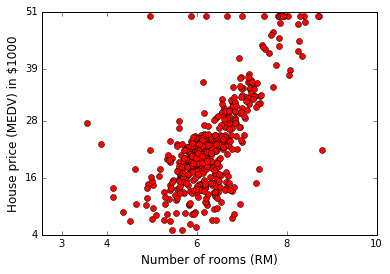

In [10]:
x = RMData
y = MEDVData
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'ro')
ax.set_xlabel('Number of rooms (RM)', fontsize = 12)
ax.set_ylabel('House price (MEDV) in $1000', fontsize = 12)

ax.set_xbound(np.min(x)-1., np.max(x)+1)
ax.set_ybound(np.min(y)-1., np.max(y)+1)

ax.set_xticks(np.round(np.linspace(np.min(x)-1., np.max(x)+1, 5)))
ax.set_yticks(np.round(np.linspace(np.min(y)-1., np.max(y)+1, 5)))

plt.show()

##### Gradient descent on the data

In [11]:
X = np.column_stack(( np.ones(len(RMData)), RMData ))
y = MEDVData
#print('X = \n',X)
#print('y = ',y)

In [12]:
theta0 = np.array([2.,2.])   # guess 1
theta0 = np.array([-15.,6.]) # guess 2
theta0 = np.array([-23.,7.]) # guess 3
theta0 = np.array([-28.,8.]) # guess 4
theta0 = np.array([-32.,9.]) # guess 5
theta0 = np.array([-33.,9.]) # guess 6
theta0 = np.array([-34.,9.]) # guess 7
th, J = GradientDescent(X, y, theta0, 0.001, 5000)
print('theta =',th)

	 Convergence was reached after 94 iterations. 

theta = [-34.00125571   8.99694634]


In [13]:
print(JcostF(th, X, y))

21.8030360431


##### Plot the data and its fit

In [14]:
fitted_y = np.dot(X,th)

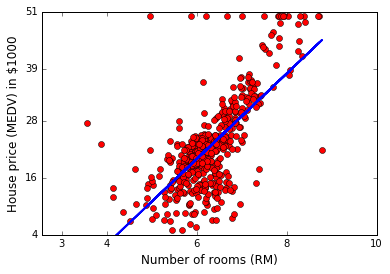

In [15]:
x = RMData
y = MEDVData
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'ro')
ax.plot(x, fitted_y, 'b-', lw=2 )

ax.set_xlabel('Number of rooms (RM)', fontsize = 12)
ax.set_ylabel('House price (MEDV) in $1000', fontsize = 12)

ax.set_xbound(np.min(x)-1., np.max(x)+1)
ax.set_ybound(np.min(y)-1., np.max(y)+1)

ax.set_xticks(np.round(np.linspace(np.min(x)-1., np.max(x)+1, 5)))
ax.set_yticks(np.round(np.linspace(np.min(y)-1., np.max(y)+1, 5)))

plt.show()

##### Solving the problem using SciPy functions

In [16]:
# check with scipy linear regression 
from scipy import stats
slope, intercept, rvalue, pvalue, stderror = stats.linregress(X[:,1], y)
print ( ('intercept = {0} slope = {1}').format(intercept, slope) )

intercept = -34.67062077643857 slope = 9.10210898118031


In [17]:
print(JcostF(np.array([intercept, slope]), X, y))

21.8002758856


In [20]:
from scipy import optimize
optimize.minimize(JcostF, x0=[2, 2],args=(X,y), method='CG', jac=False)

     fun: 21.80027588558499
     jac: array([  4.76837158e-07,   4.29153442e-06])
 message: 'Optimization terminated successfully.'
    nfev: 68
     nit: 6
    njev: 17
  status: 0
 success: True
       x: array([-34.67061856,   9.10210873])

In [21]:
optimize.minimize(JcostF, x0=[2, 2],args=(X,y), method='L-BFGS-B', jac=False)

      fun: 21.800275885589329
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.00000000e+00,  -3.55271368e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 45
      nit: 11
   status: 0
  success: True
        x: array([-34.67059362,   9.10210471])

### <font color=red>References</font> #

Additional discussion and examples can be found at:

- [Random sample consensus (RANSAC) algorithm](http://scipy-cookbook.readthedocs.io/items/RANSAC.html)
- [SciPy Cookbook: Optimization and fitting](http://scipy-cookbook.readthedocs.io/items/idx_optimization_and_fitting.html)


>#### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2016-2017 Sergio Rojas (srojas@usb.ve). ###
